In [1]:
import fiona
import geopandas as gpd
import pandas as pd

In [2]:
layers = fiona.listlayers('data/scipy/scag_region.gpkg')
layers

['tracts']

In [3]:
scag = gpd.read_file('data/scipy/scag_region.gpkg', layer='tracts')

In [8]:
type(scag)

geopandas.geodataframe.GeoDataFrame

In [9]:
scag.head()

,geoid,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,...,year,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled,geometry
0,06037128702,58.0,0.0,223.0,0.0,475.0,986.0,None,None,None,...,2010,2903.0,64.726214,None,None,None,None,None,None,"POLYGON ((-118.44870 34.16485, -118.43997 34.1..."
1,06037131600,83.0,62.0,777.0,0.0,135.0,1355.0,None,None,None,...,2010,1487.0,28.679979,None,None,None,None,None,None,"POLYGON ((-118.56229 34.22033, -118.55792 34.2..."
2,06037134104,287.0,17.0,816.0,0.0,61.0,1323.0,None,None,None,...,2010,1388.0,14.846188,None,None,None,None,None,None,"POLYGON ((-118.57976 34.21558, -118.57539 34.2..."
3,06037134304,90.0,24.0,298.0,0.0,89.0,520.0,None,None,None,...,2010,928.0,33.378933,None,None,None,None,None,None,"POLYGON ((-118.61472 34.21952, -118.61039 34.2..."
4,06037242000,0.0,229.0,681.0,0.0,0.0,1164.0,None,None,None,...,2010,1054.0,0.058565,None,None,None,None,None,None,"POLYGON ((-118.25416 33.93882, -118.25413 33.9..."


In [10]:
scag.shape

(4580, 194)

In [12]:
len(scag.columns)

194

In [13]:
scag.geometry

0       POLYGON ((-118.44870 34.16485, -118.43997 34.1...
1       POLYGON ((-118.56229 34.22033, -118.55792 34.2...
2       POLYGON ((-118.57976 34.21558, -118.57539 34.2...
3       POLYGON ((-118.61472 34.21952, -118.61039 34.2...
4       POLYGON ((-118.25416 33.93882, -118.25413 33.9...
                              ...                        
4575    POLYGON ((-118.50373 34.42607, -118.50050 34.4...
4576    POLYGON ((-118.20731 33.90754, -118.20641 33.9...
4577    POLYGON ((-119.22134 34.18130, -119.21727 34.1...
4578    POLYGON ((-116.51068 33.80502, -116.51069 33.8...
4579    POLYGON ((-118.41379 34.17940, -118.41160 34.1...
Name: geometry, Length: 4580, dtype: geometry

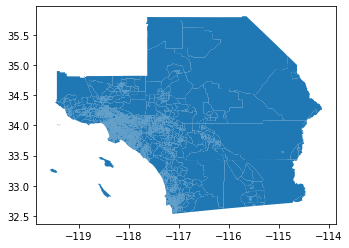

In [14]:
scag.plot()

In [4]:
clinics_df = gpd.read_file('data/scipy/behavioralHealth.shp')
clinics_df.columns

Index(['OBJECTID', 'SITE_TYPE', 'SITE_NAME', 'ADDRESS', 'CITY', 'ZIPCODE',
       'PHONE', 'geometry'],
      dtype='object')

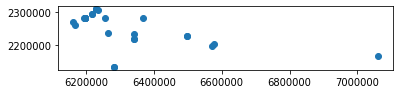

In [16]:
clinics_df.plot()

In [17]:
clinics_df.head()

,OBJECTID,SITE_TYPE,SITE_NAME,ADDRESS,CITY,ZIPCODE,PHONE,geometry
0,149.0,Behavioral Health,Older Adult Services,6355 Riverside Ave,Riverside,92506,951-369-0219,POINT (6216487.156 2291913.664)
1,150.0,Behavioral Health,Children'S Treatment Services,9990 County Farm Rd,Riverside,92503,951-358-4840,POINT (6195566.226 2280519.190)
2,151.0,Behavioral Health,"Family, Adolescent, And Children'S Treatment",1195 Magnolia Ave,Corona,91719,951-273-0608,POINT (6168252.101 2261023.951)
3,447.0,Behavioral Health,Blythe Clinic,1297 W Hobson Way,Blythe,92225,760-770-2222,POINT (7059944.605 2169652.046)
4,152.0,Behavioral Health,Interagency Services For Families,9890 County Farm Rd,Riverside,92503,951-358-4850,POINT (6195949.672 2280510.302)


In [21]:
len(clinics_df.ADDRESS.unique())

18

### Extracting Riverside County Tracts

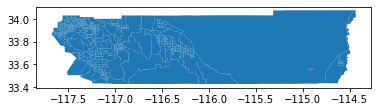

In [5]:
rc = scag[scag['geoid'].str.match('^06065')] # tracts whose geoid beggins with 06065 (Riverside County)
rc.plot()

### Spatial Joins

Using both the `rc` and `clinic_df` datasets, the idea is to find out how many clinics are in each census tract in Riverside County.


In [6]:
clinics_tracts = gpd.sjoin(left_df=clinics_df, right_df=rc, op='within')

/Users/cristian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2230
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [7]:
clinics_df.crs

<Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
rc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

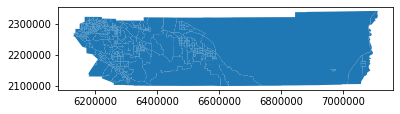

In [9]:

rc.to_crs(clinics_df.crs).plot()

In [10]:
# reproject rc to the crs of clinics_df
rc = rc.to_crs(clinics_df.crs)

In [11]:
clinics_tracts = gpd.sjoin(left_df=clinics_df, right_df=rc, op='within')

In [12]:
clinics_tracts.head()

,OBJECTID,SITE_TYPE,SITE_NAME,ADDRESS,CITY,ZIPCODE,PHONE,geometry,index_right,geoid,...,n_white_persons,year,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled
0,149.0,Behavioral Health,Older Adult Services,6355 Riverside Ave,Riverside,92506,951-369-0219,POINT (6216487.156 2291913.664),661,06065031100,...,None,2010,1715.0,49.159311,None,None,None,None,None,None
25,146.0,Behavioral Health,Adult Mental Health Services - Central Clinic,6355 Riverside Ave,Riverside,92506,951-369-5714,POINT (6216489.695 2291912.394),661,06065031100,...,None,2010,1715.0,49.159311,None,None,None,None,None,None
1,150.0,Behavioral Health,Children'S Treatment Services,9990 County Farm Rd,Riverside,92503,951-358-4840,POINT (6195566.226 2280519.190),1798,06065041201,...,None,2010,1135.0,25.836431,None,None,None,None,None,None
4,152.0,Behavioral Health,Interagency Services For Families,9890 County Farm Rd,Riverside,92503,951-358-4850,POINT (6195949.672 2280510.302),1798,06065041201,...,None,2010,1135.0,25.836431,None,None,None,None,None,None
5,448.0,Behavioral Health,Children'S Evaluation Services Unite,9990 County Farm Rd,Riverside,92503,951-358-7380,POINT (6195566.226 2280519.190),1798,06065041201,...,None,2010,1135.0,25.836431,None,None,None,None,None,None


In [13]:
clinics_tracts.shape

(28, 202)

In [16]:
ct = clinics_tracts[['geoid', 'index_right']].groupby('geoid').agg('count')
ct.shape

(16, 1)

In [17]:
ct.head()

,index_right
geoid,
06065031100,2
06065040809,1
06065041201,7
06065041813,1
06065042209,3


In [18]:
# perform outer join, so that also non-matching values are kept.
# For those values, 0 will be set on the 'index_right' column
rc = rc.merge(ct, on='geoid', how='outer').fillna(0)

In [19]:
rc.head()

,geoid,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,...,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled,geometry,index_right
0,06065042005,7.0,157.0,259.0,0.0,540.0,1472.0,0,0,0,...,1511.0,52.240247,0,0,0,0,0,0,"POLYGON ((6220451.886 2273544.863, 6222975.821...",0.0
1,06065042210,14.0,4.0,392.0,0.0,49.0,626.0,0,0,0,...,2047.0,26.254459,0,0,0,0,0,0,"POLYGON ((6231281.704 2304380.325, 6231334.275...",1.0
2,06065042403,10.0,62.0,604.0,0.0,142.0,1153.0,0,0,0,...,1194.0,27.105703,0,0,0,0,0,0,"POLYGON ((6265534.814 2293274.461, 6268193.946...",0.0
3,06065042405,17.0,570.0,877.0,0.0,140.0,1949.0,0,0,0,...,1960.0,12.679643,0,0,0,0,0,0,"POLYGON ((6254901.013 2289559.243, 6257552.324...",0.0
4,06065042507,6.0,196.0,1132.0,0.0,47.0,1778.0,0,0,0,...,1209.0,11.965812,0,0,0,0,0,0,"POLYGON ((6260074.881 2265634.857, 6260130.853...",0.0


In [20]:
rc['index_right'].sum()

28.0

In [21]:
rc.rename(columns={'index_right': 'clinics'}, inplace=True)


In [23]:
rc.clinics.sum()

28.0

In [24]:
rc.clinics

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
448    0.0
449    0.0
450    0.0
451    0.0
452    0.0
Name: clinics, Length: 453, dtype: float64

In [25]:
rc.head()

,geoid,n_asian_under_15,n_black_under_15,n_hispanic_under_15,n_native_under_15,n_white_under_15,n_persons_under_18,n_asian_over_60,n_black_over_60,n_hispanic_over_60,...,n_total_housing_units_sample,p_nonhisp_white_persons,p_white_over_60,p_black_over_60,p_hispanic_over_60,p_native_over_60,p_asian_over_60,p_disabled,geometry,clinics
0,06065042005,7.0,157.0,259.0,0.0,540.0,1472.0,0,0,0,...,1511.0,52.240247,0,0,0,0,0,0,"POLYGON ((6220451.886 2273544.863, 6222975.821...",0.0
1,06065042210,14.0,4.0,392.0,0.0,49.0,626.0,0,0,0,...,2047.0,26.254459,0,0,0,0,0,0,"POLYGON ((6231281.704 2304380.325, 6231334.275...",1.0
2,06065042403,10.0,62.0,604.0,0.0,142.0,1153.0,0,0,0,...,1194.0,27.105703,0,0,0,0,0,0,"POLYGON ((6265534.814 2293274.461, 6268193.946...",0.0
3,06065042405,17.0,570.0,877.0,0.0,140.0,1949.0,0,0,0,...,1960.0,12.679643,0,0,0,0,0,0,"POLYGON ((6254901.013 2289559.243, 6257552.324...",0.0
4,06065042507,6.0,196.0,1132.0,0.0,47.0,1778.0,0,0,0,...,1209.0,11.965812,0,0,0,0,0,0,"POLYGON ((6260074.881 2265634.857, 6260130.853...",0.0


In [32]:
geoids_set = set(scag.geoid.str[:5])

In [47]:
import os
out_path = 'output/south_california'
if not os.path.exists(out_path):
    os.mkdir(out_path)
for geoid in geoids_set:
    geoids_df = scag[scag['geoid'].str[:5] == geoid]
    geoids_df.to_file(f'{out_path}/{geoid}.shp')

/Users/cristian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  import sys


.
